In [2]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
folder_to_name = {'hsbam': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'traffic_jam': 'tj_dpp',
                  'bam_mutants': 'bam',
                  'oskar': 'osk'
                 }
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [4]:
arr[1:100, 1:100]

array([[3, 0, 0, ..., 2, 1, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

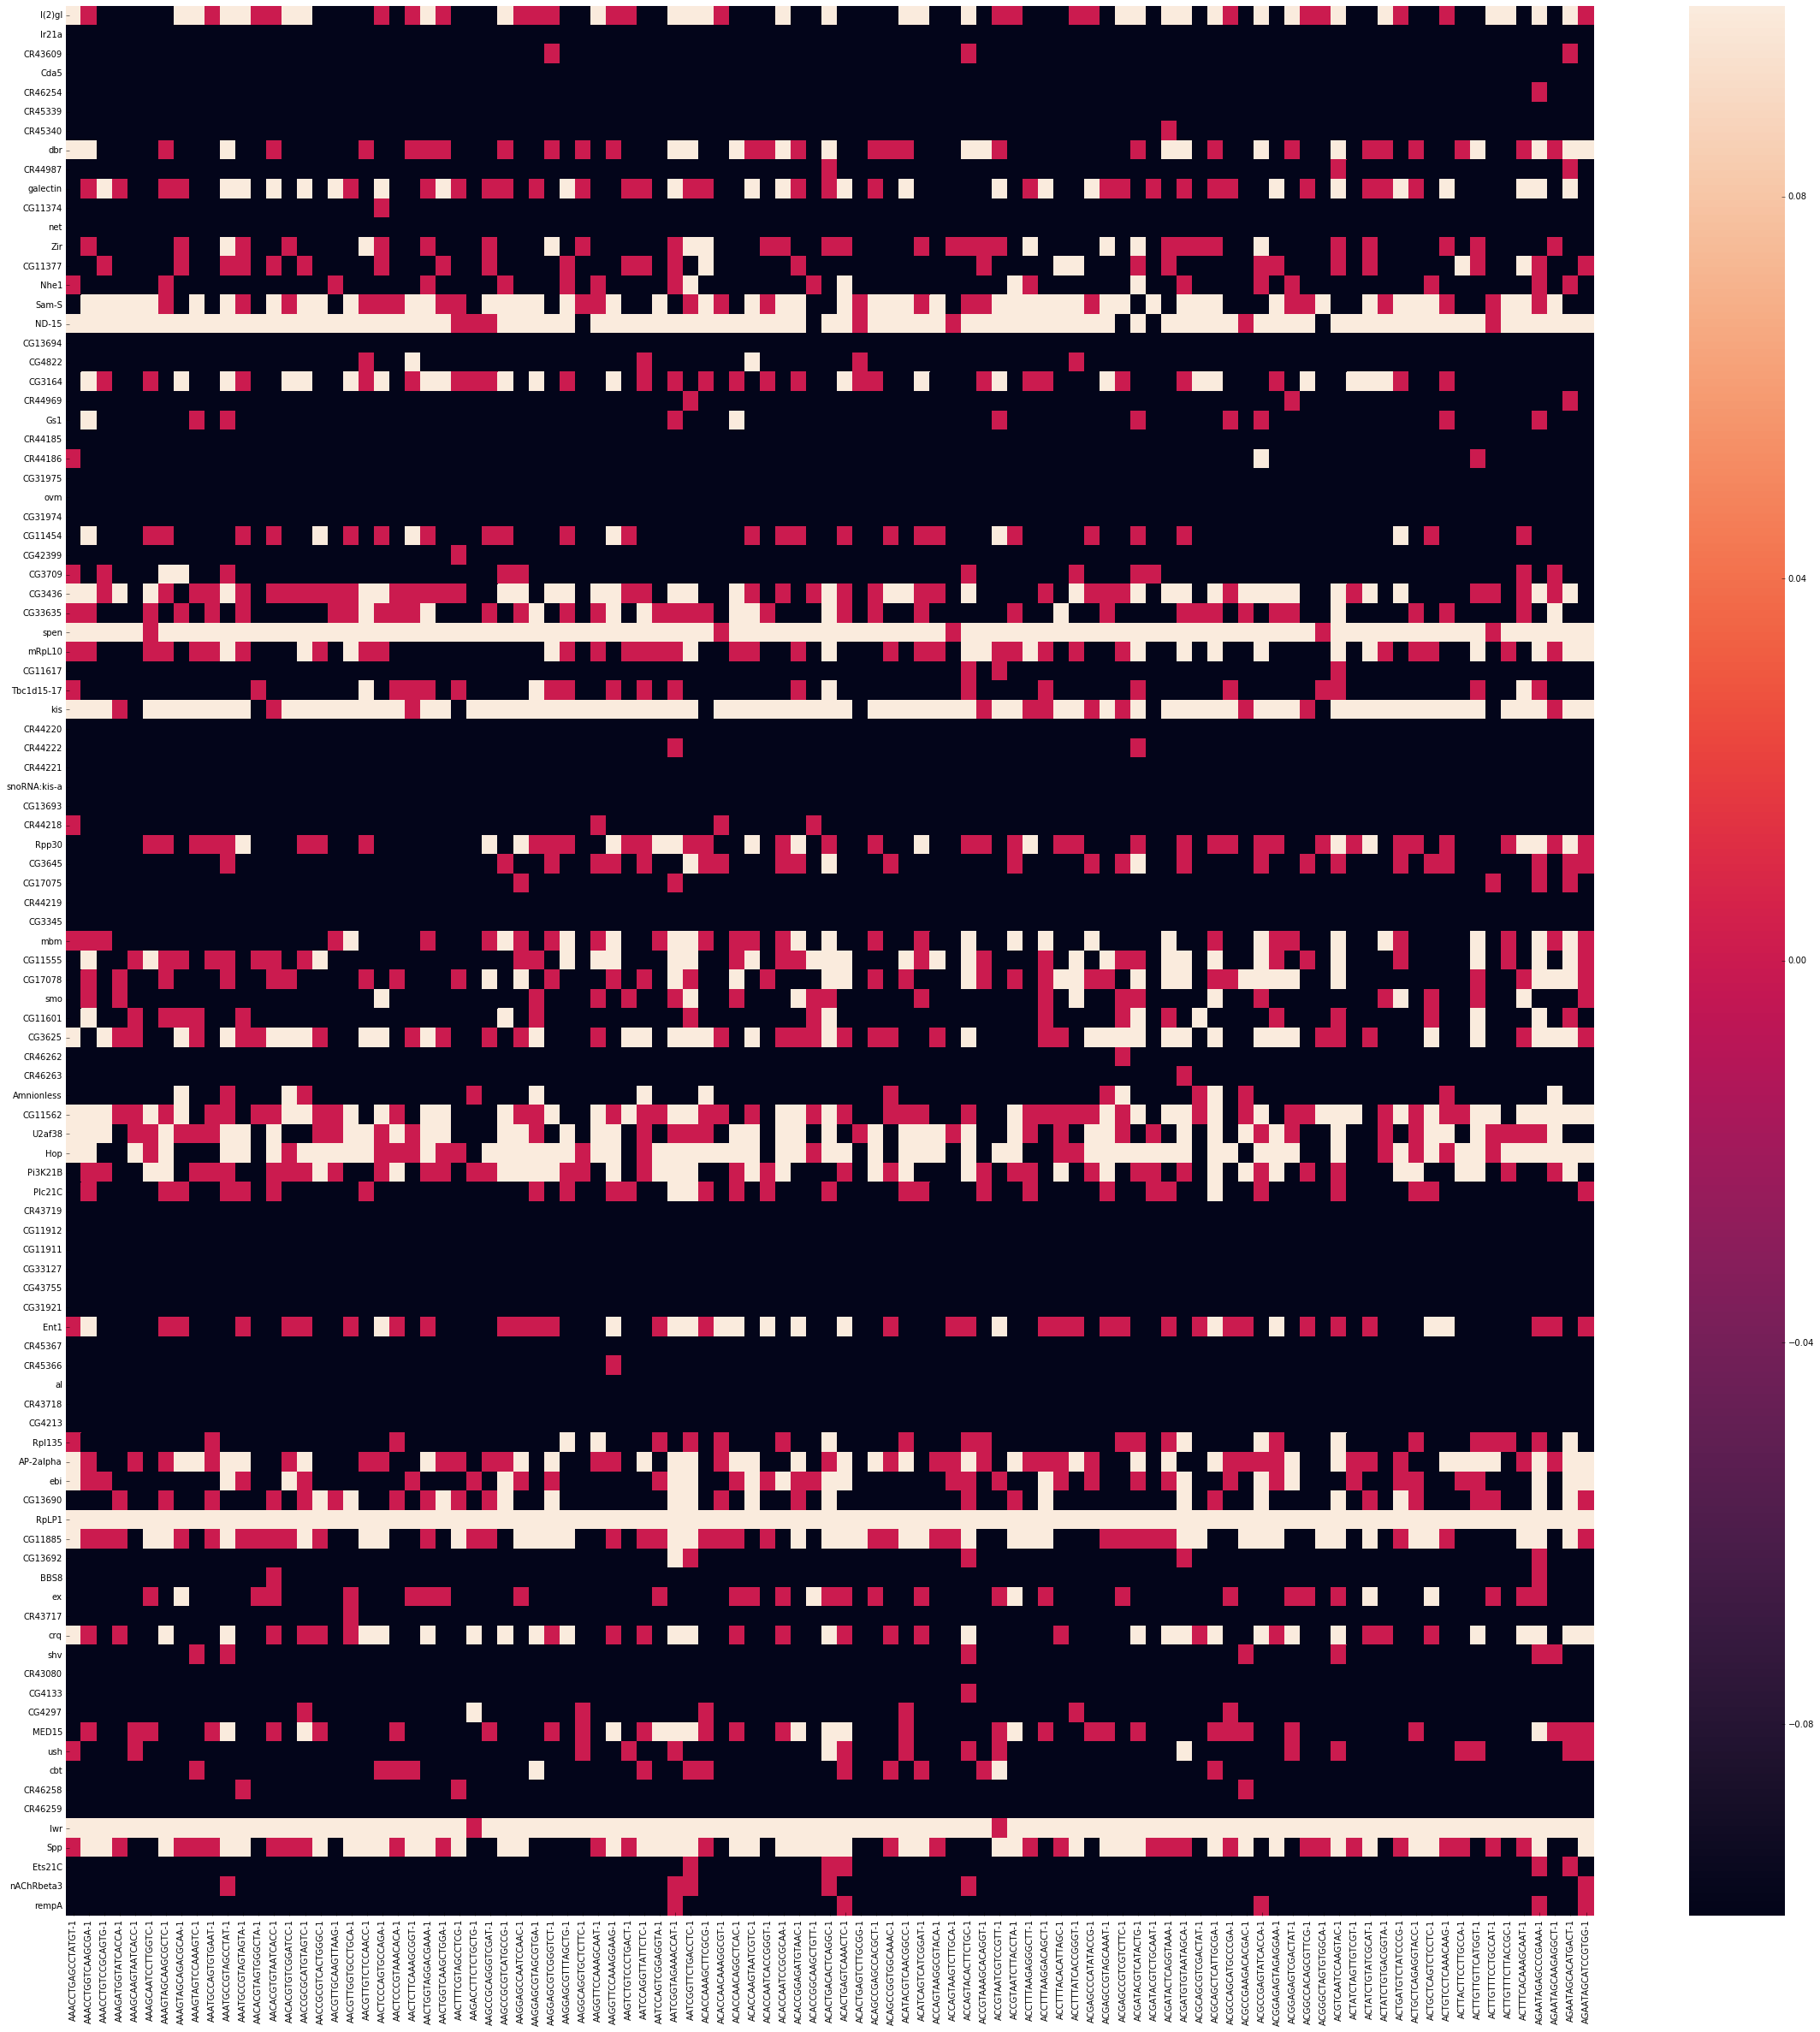

In [5]:
plt.figure(figsize=(40, 40))
sns.heatmap(np.log(data_frames['wtF'].iloc[1:100, 1:100]))

In [6]:
df = data_frames['wtF']
df.shape

(17433, 753)

In [52]:
df = pd.DataFrame(arr)
df.index = gene_names
df.shape

(17433, 1524)

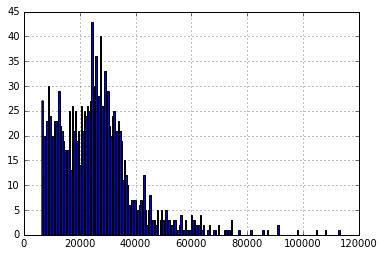

In [10]:
df.sum(axis=0).hist(bins=200)

In [13]:
df.sum(axis=0).min()

6233

## Reproducing tSNE clustering of ~7 cell types

We aim to see if all 7 dataframes can be normalized, filtered and reduced such that their dimensionality reduction clustering recaptures the 7 cell type clusterings. However, it's also possible that the mutant / overexpression data sets have fewer clusters. 

Then, we can take an intermediary data matrix, likely of the variable, normalized genes, and use that as input to the Inferelator

NameError: name 'df_key' is not defined

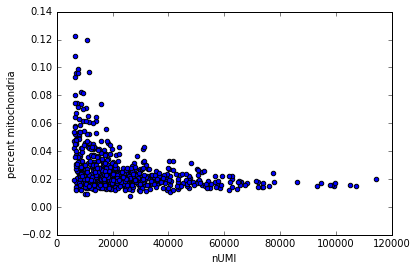

In [7]:
original_len = df.shape[1]
mito_df = df[[x.__contains__("mt:") for x in df.index]]
percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
nGene = df[df > 0].count(axis = 0)
percent_mito_5percent = percent_mito < 0.05
number_nGene_250 = 250 < nGene 
number_nGene_5000 = nGene < 6000
df_filtered = df.loc[:, percent_mito_5percent & number_nGene_5000 & number_nGene_250]
new_len = df_filtered.shape[1]
nUMI = df.sum(axis = 0)
plt.scatter(nUMI, percent_mito)
plt.xlabel('nUMI')
plt.ylabel('percent mitochondria')
plt.title('{} '.format(df_key))
plt.show()
plt.scatter(nUMI, nGene)
plt.xlabel('nUMI')
plt.ylabel('nGene')
plt.title('{} '.format(df_key))
plt.show()

In [15]:
df_nonzero = df_filtered.copy(deep=True)
df_nonzero[df_nonzero > 0] = 1
df_nonzero.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,1,1,1,0,0,0,0,0,1,1,...,0,1,0,0,1,1,1,1,1,1
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Convert gene symbols to Gene ids

In [29]:
gtf = pd.read_csv('~/Dev/Drosophila_inferelator/Drosophila_melanogaster.BDGP6.91.genes.gtf', sep='\t', header = None)

In [30]:
gtf.head()

,0,1,2,3,4,5,6,7,8
0,3R,FlyBase,gene,567076,2532932,.,+,.,"gene_id ""FBgn0267431""; gene_name ""Myo81F""; gen..."
1,3R,FlyBase,gene,722370,722621,.,-,.,"gene_id ""FBgn0085804""; gene_name ""CR41571""; ge..."
2,3R,FlyBase,gene,1031171,1031354,.,+,.,"gene_id ""FBgn0039987""; gene_name ""CR12798""; ge..."
3,3R,FlyBase,gene,1366234,1366601,.,-,.,"gene_id ""FBgn0267798""; gene_name ""CR46123""; ge..."
4,3R,FlyBase,gene,1865108,1866008,.,-,.,"gene_id ""FBgn0267797""; gene_name ""CR46122""; ge..."


In [31]:
gene_sym_to_id = {}

In [42]:
for (idx, row) in gtf.iterrows():
    st = row[8]
    splits = st.split(';')
    i = splits[0].split(" ")[1].strip('"')
    sym = splits[1].split(" ")[2].strip('"').rstrip(';').rstrip('"').replace(';', '')
    gene_sym_to_id[sym] = i
    # UpperCase first letter
    gene_sym_to_id[sym.title()] = i
    

In [43]:
len(gene_sym_to_id)

32700

In [44]:
gene_sym_to_id.keys()

['Cg44774',
 'Cg3625',
 'Cg3626',
 'CG4101',
 'Cr45200',
 'Br140',
 'CG8654',
 'Sac1',
 'bocks',
 'Mst77Y-8Psi',
 'Tektin-C',
 'Tektin-A',
 'Twdlz',
 'Cg43098',
 'Cg43095',
 'Cg43094',
 'Cg43093',
 'Cg43092',
 'Cg43091',
 'Cg43090',
 'Cr44374',
 'Cr44375',
 'Cr44376',
 'Cr44377',
 'Cr44370',
 'Cr44371',
 'Cr44372',
 'Trna:Arg-Tcg-4-1',
 'Cr44379',
 'Cg3927',
 'FeCH',
 'Cg13438',
 'Cg2577',
 'Cg2574',
 'Cg13430',
 'Cg13436',
 'Cg13437',
 'Cr45773',
 'Cr45772',
 'Znt63C',
 'Cr45777',
 'Cr45776',
 'Cr45775',
 'Cr45779',
 'Cr45778',
 'Iotatry',
 'Cg9297',
 'Cg9294',
 'Cg42329',
 'Cg42326',
 'Mura',
 'Cg42324',
 'Cg42322',
 'Cg42323',
 'Cg42321',
 'Gammacop',
 'CG9689',
 'Snorna:Psi28S-2876',
 'CG9682',
 'CG9684',
 'CG9686',
 'Cg10166',
 'Cg10165',
 'Cg10164',
 'Cg10163',
 'p47',
 'Cg10168',
 'Cg18754',
 'dnd',
 'dnc',
 'Cr31054',
 'dnk',
 'dnt',
 'Ostgamma',
 'Tll',
 'Cyp9c1',
 'l(3)neo43',
 'Cr44490',
 'Sry-beta',
 'Chld3',
 'La',
 'Lk',
 'Cg15263',
 'Cg15262',
 'Lt',
 'Cg15260',
 'pinta'

In [57]:
gene_sym_to_id['Rab21']

'FBgn0039966'

In [41]:
'Ime4'.lower()

'ime4'

In [50]:
fraction_nonzero = 0.2
idx = df_nonzero.index[df_nonzero.sum(axis=1) > float(df.shape[1]) * fraction_nonzero]
exp = df_filtered.loc[idx, :]
exp.shape

(5384, 704)

In [49]:
exp = exp.loc[set(gene_sym_to_id.keys()).intersection(exp.index), :]
new_index = [gene_sym_to_id[sym] for sym in exp.index]
new_index[0:10]

['FBgn0085412',
 'FBgn0039265',
 'FBgn0011336',
 'FBgn0038274',
 'FBgn0039266',
 'FBgn0033357',
 'FBgn0028689',
 'FBgn0030196',
 'FBgn0038438',
 'FBgn0267972']

In [56]:
set(df.index) - set(gene_sym_to_id.keys())

{'CG10326',
 'CG10639',
 'CG10671',
 'CG1109',
 'CG11412',
 'CG11577',
 'CG11739',
 'CG11880',
 'CG12014',
 'CG12207',
 'CG1287',
 'CG1311',
 'CG13477',
 'CG13646',
 'CG15618',
 'CG15735',
 'CG15925',
 'CG1678',
 'CG16947',
 'CG17386',
 'CG17680',
 'CG2025',
 'CG3011',
 'CG31547',
 'CG31851',
 'CG32141',
 'CG32150',
 'CG32319',
 'CG3238',
 'CG3303',
 'CG3800',
 'CG3814',
 'CG4065',
 'CG4159',
 'CG45057',
 'CG45186',
 'CG4848',
 'CG5010',
 'CG5204',
 'CG5621',
 'CG6439',
 'CG6812',
 'CG7593',
 'CG7787',
 'CG7813',
 'CG7979',
 'CG8083',
 'CG8596',
 'CG8866',
 'CG8909',
 'CG9090',
 'CG9305',
 'CG9323',
 'CG9940',
 'CR18854',
 'CR32205',
 'CR32207',
 'CR43628',
 'CstF-50',
 'CstF-64',
 'Cyp9f3Psi',
 'Mpcp',
 'NAA15-16',
 'NAA20',
 "PP2A-B'",
 'Pallidin',
 'Ranbp11',
 'Trn-SR',
 'Vps54L',
 'alpha-catenin-related',
 'alphagamma-element:CR32865',
 'att-ORFA',
 'cbx',
 'cln3',
 'fas',
 'fd64A',
 'fu2',
 'nct',
 'pcl',
 'pncr009:3L',
 'pre-rRNA-Psi:CR45856',
 'sda',
 'snRNA:U12:73B',
 'snRNA:U3

In [54]:
len(set(df.index))

17433

In [46]:
len(new_index)

5338

In [88]:
exp.index = new_index
exp.to_csv('expression.tsv', sep='\t')

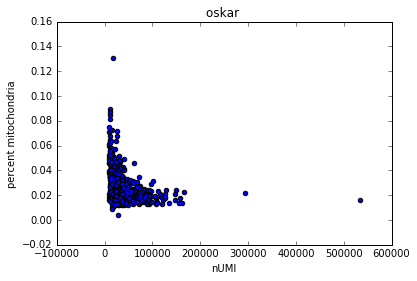

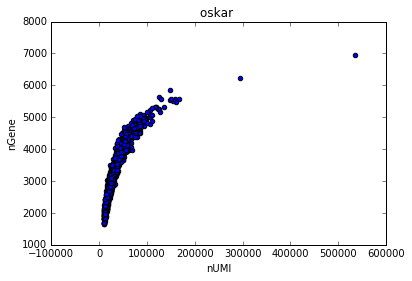

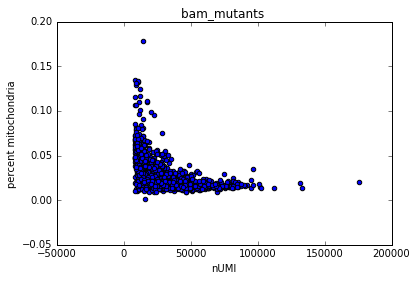

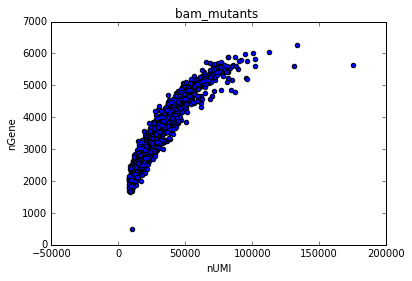

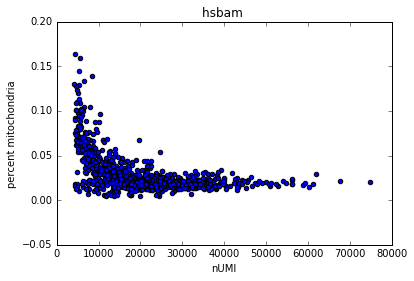

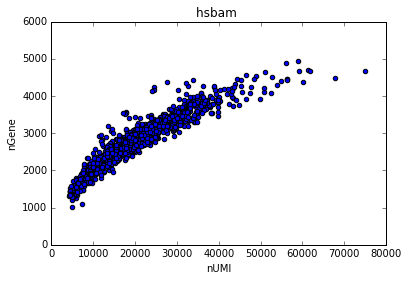

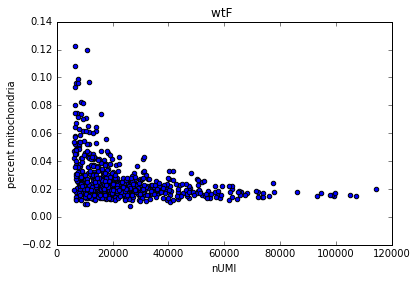

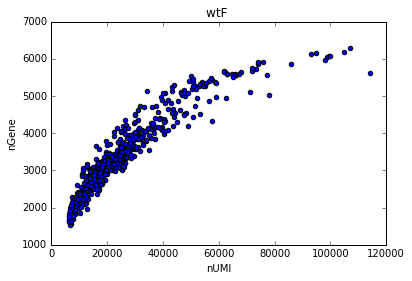

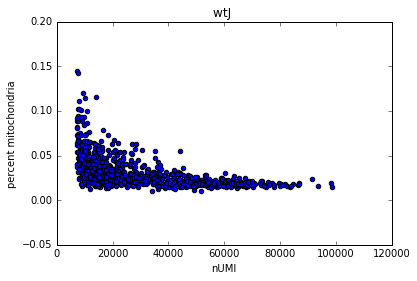

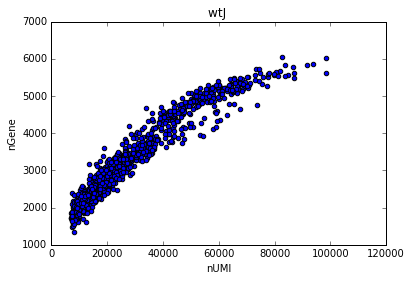

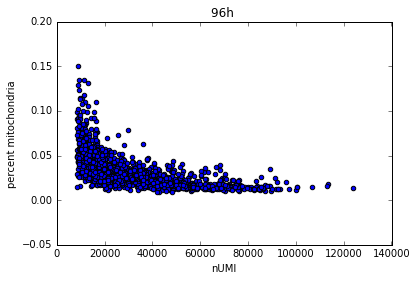

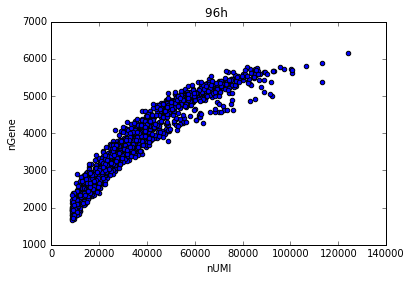

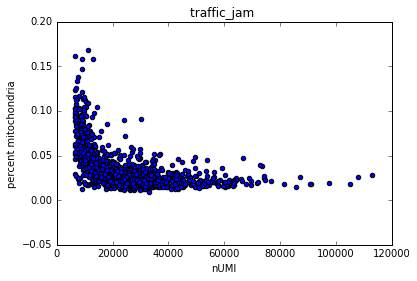

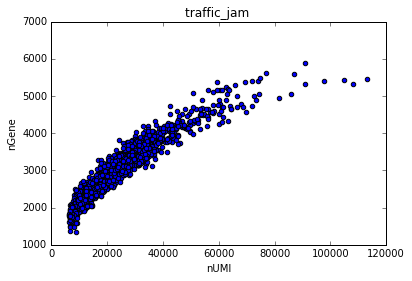

In [19]:
filtered_data_frames = {}
filtered_lengths = {}
for df_key in data_frames:
    df = data_frames[df_key]
    original_len = df.shape[1]
    mito_df = df[[x.__contains__("mt:") for x in df.index]]
    percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
    nGene = df[df > 0].count(axis = 0)
    percent_mito_5percent = percent_mito < 0.05
    number_nGene_250 = 250 < nGene 
    number_nGene_5000 = nGene < 6000
    df_filtered = df.loc[:, percent_mito_5percent & number_nGene_5000 & number_nGene_250]
    new_len = df_filtered.shape[1]
    nUMI = df.sum(axis = 0)
    plt.scatter(nUMI, percent_mito)
    plt.xlabel('nUMI')
    plt.ylabel('percent mitochondria')
    plt.title('{} '.format(df_key))
    plt.show()
    plt.scatter(nUMI, nGene)
    plt.xlabel('nUMI')
    plt.ylabel('nGene')
    plt.title('{} '.format(df_key))
    plt.show()
    filtered_lengths[df_key] = (original_len, new_len)
    filtered_data_frames[df_key] = df_filtered

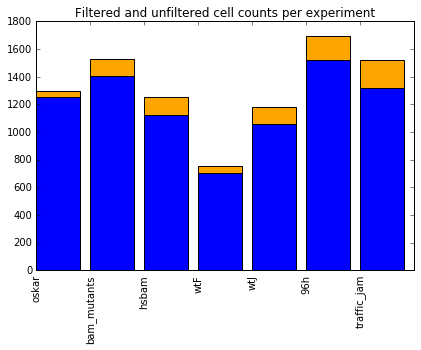

In [20]:
idx = np.arange(len(filtered_lengths))
plt.bar(idx, [x[0] for x in filtered_lengths.values()], color='orange')
plt.bar(idx, [x[1] for x in filtered_lengths.values()])
plt.tight_layout()
plt.xticks(idx, filtered_lengths.keys(),  rotation='vertical')
plt.title('Filtered and unfiltered cell counts per experiment')
plt.show()


In [3]:
germ_cell_metagene = ['bru1',
'Pdcd4',
'RpS5b',
'AGO3',
'vas',
'ovo',
'TfIIA-S',
'CG9926']

In [18]:
dset = 'wtJ' # 'wtF'

In [33]:
(df.loc[gene, :] > 0).get_values()

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,

In [45]:
df[(df.loc[gene, :] > 0).get_values()]

ValueError: Item wrong length 1178 instead of 17433.

In [49]:
proportion_high_nGene = {}
for gene in data_frames[dset].index:
    df = data_frames[dset]
    nGenes = df[df > 0].count(axis = 0)
    gene_vals = df.loc[gene, :]
    non_zero_genes = float(sum(gene_vals > 0))
    if non_zero_genes > 100:
        print gene
        proportion_high_nGene[gene] = sum((gene_vals > 0) & (nGene > 5000)) / non_zero_genes

l(2)gl
dbr
galectin
Zir
CG11377
Nhe1
Sam-S
ND-15
CG3164
Gs1
CG11454
CG3436
CG33635
spen
mRpL10
Tbc1d15-17
kis
Rpp30
CG3645
mbm
CG11555
CG17078
smo
CG11601
CG3625
Amnionless
CG11562
U2af38
Hop
Pi3K21B
Plc21C
Ent1
RpI135
AP-2alpha
ebi
CG13690
RpLP1
CG11885
CG13692
ex
crq
CG4297
MED15
ush
cbt
lwr
Spp
Ets21C
rempA
Tspo
CG11835
CG2794
Nle
Sf3b1
Ipk2
cold
Gsc
CR46148
CG13689
CG2839
ds
Nnf1b
Dbp21E2
Saf6
Pex12
PGAP2
Clp
CG3662
CG3862
dock
drongo
CG4291
kraken
CG13949
aru
dbe
PNUTS
CG4415
S
ast
Atg4a
mtRNApol
Pino
CG4552
MFS3
l(2)10685
Tfb4
Vps29
capt
Tango14
CG5080
IntS14
CG14341
Plap
CG31922
Charon
CG4887
CG4896
CG5126
Tgt
CG14346
robo2
CG18131
CG7420
CG14352
RFeSP
chinmo
cpb
CG17660
mRpL48
Rim2
Eno
Rrp40
CG31937
CG17652
CG17646
CG17712
CG17650
Wdr62
Der-1
CG15356
CG7289
Got2
Npc2a
CG4238
Su(dx)
Kebab
GlyP
tho2
CG11723
TBCD
AIF
aop
CG10874
Uch
CG34174
CG10880
mio
papi
CG15387
sau
Sec24CD
CG9967
Rab5
Axud1
CG3609
CG15390
Atxn7
Eogt
PIG-Wa
Slh
oaf
Cyp309a1
insv
ND-B17.2
Arpc5
Drp1
CG15398
Hrs


(array([ 17.,  35.,  67.,  57.,  53.,  27.,   8.,   3.,   2.,   6.]),
 array([ 0.        ,  0.05245098,  0.10490196,  0.15735294,  0.20980392,
         0.2622549 ,  0.31470588,  0.36715686,  0.41960784,  0.47205882,
         0.5245098 ]),
 <a list of 10 Patch objects>)

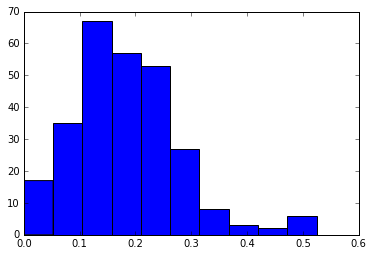

In [43]:
plt.hist(proportion_high_nGene.values())

In [44]:
plt.hist(proportion_high_nGene[germ_cell_metagene].values(), color = 'orange')

TypeError: unhashable type: 'list'

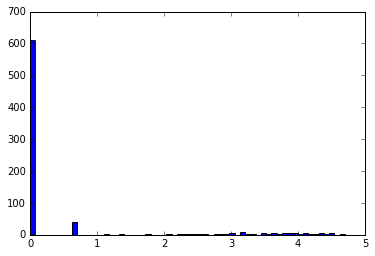

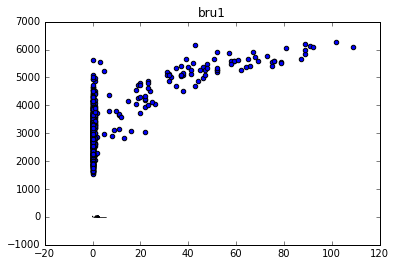

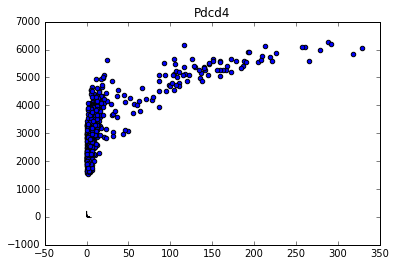

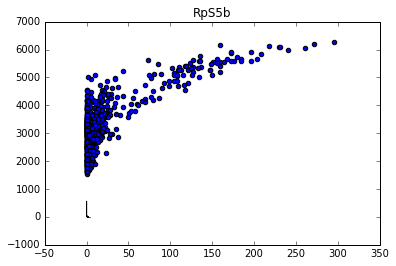

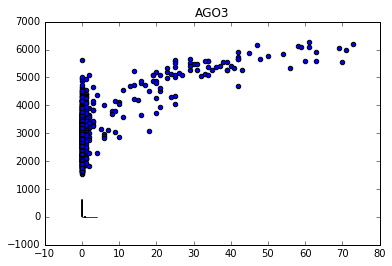

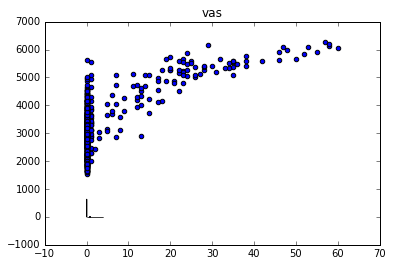

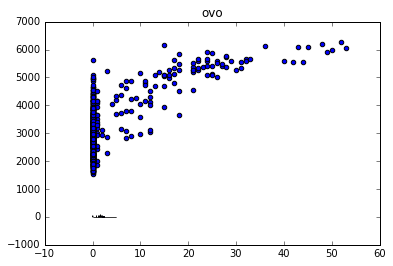

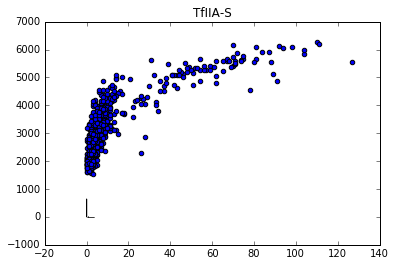

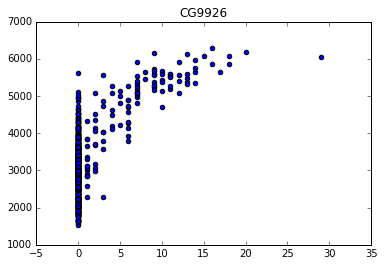

In [17]:
for gene in germ_cell_metagene:
    df = data_frames[dset]
    plt.hist(np.log(df.loc[gene, :] + 1), bins=60)
    plt.show()
    nGene = df[df > 0].count(axis = 0)
    plt.scatter(df.loc[gene, :], nGene)
    plt.title(gene)

In [288]:
combined = pd.concat(filtered_data_frames.values(), join='outer', axis  =1 )


In [289]:
combined.shape

(17433, 7807)

In [296]:
scale_factor = 10000
# pseudocount added so that log isn't taken of 0
combined_transformed = np.log((combined / combined.sum() *  scale_factor) + 1)

In [302]:
combined_transformed.to_csv(os.path.join(matrices_dir, "filtered_log_transformed_merged_reads.tsv"), sep='\t')

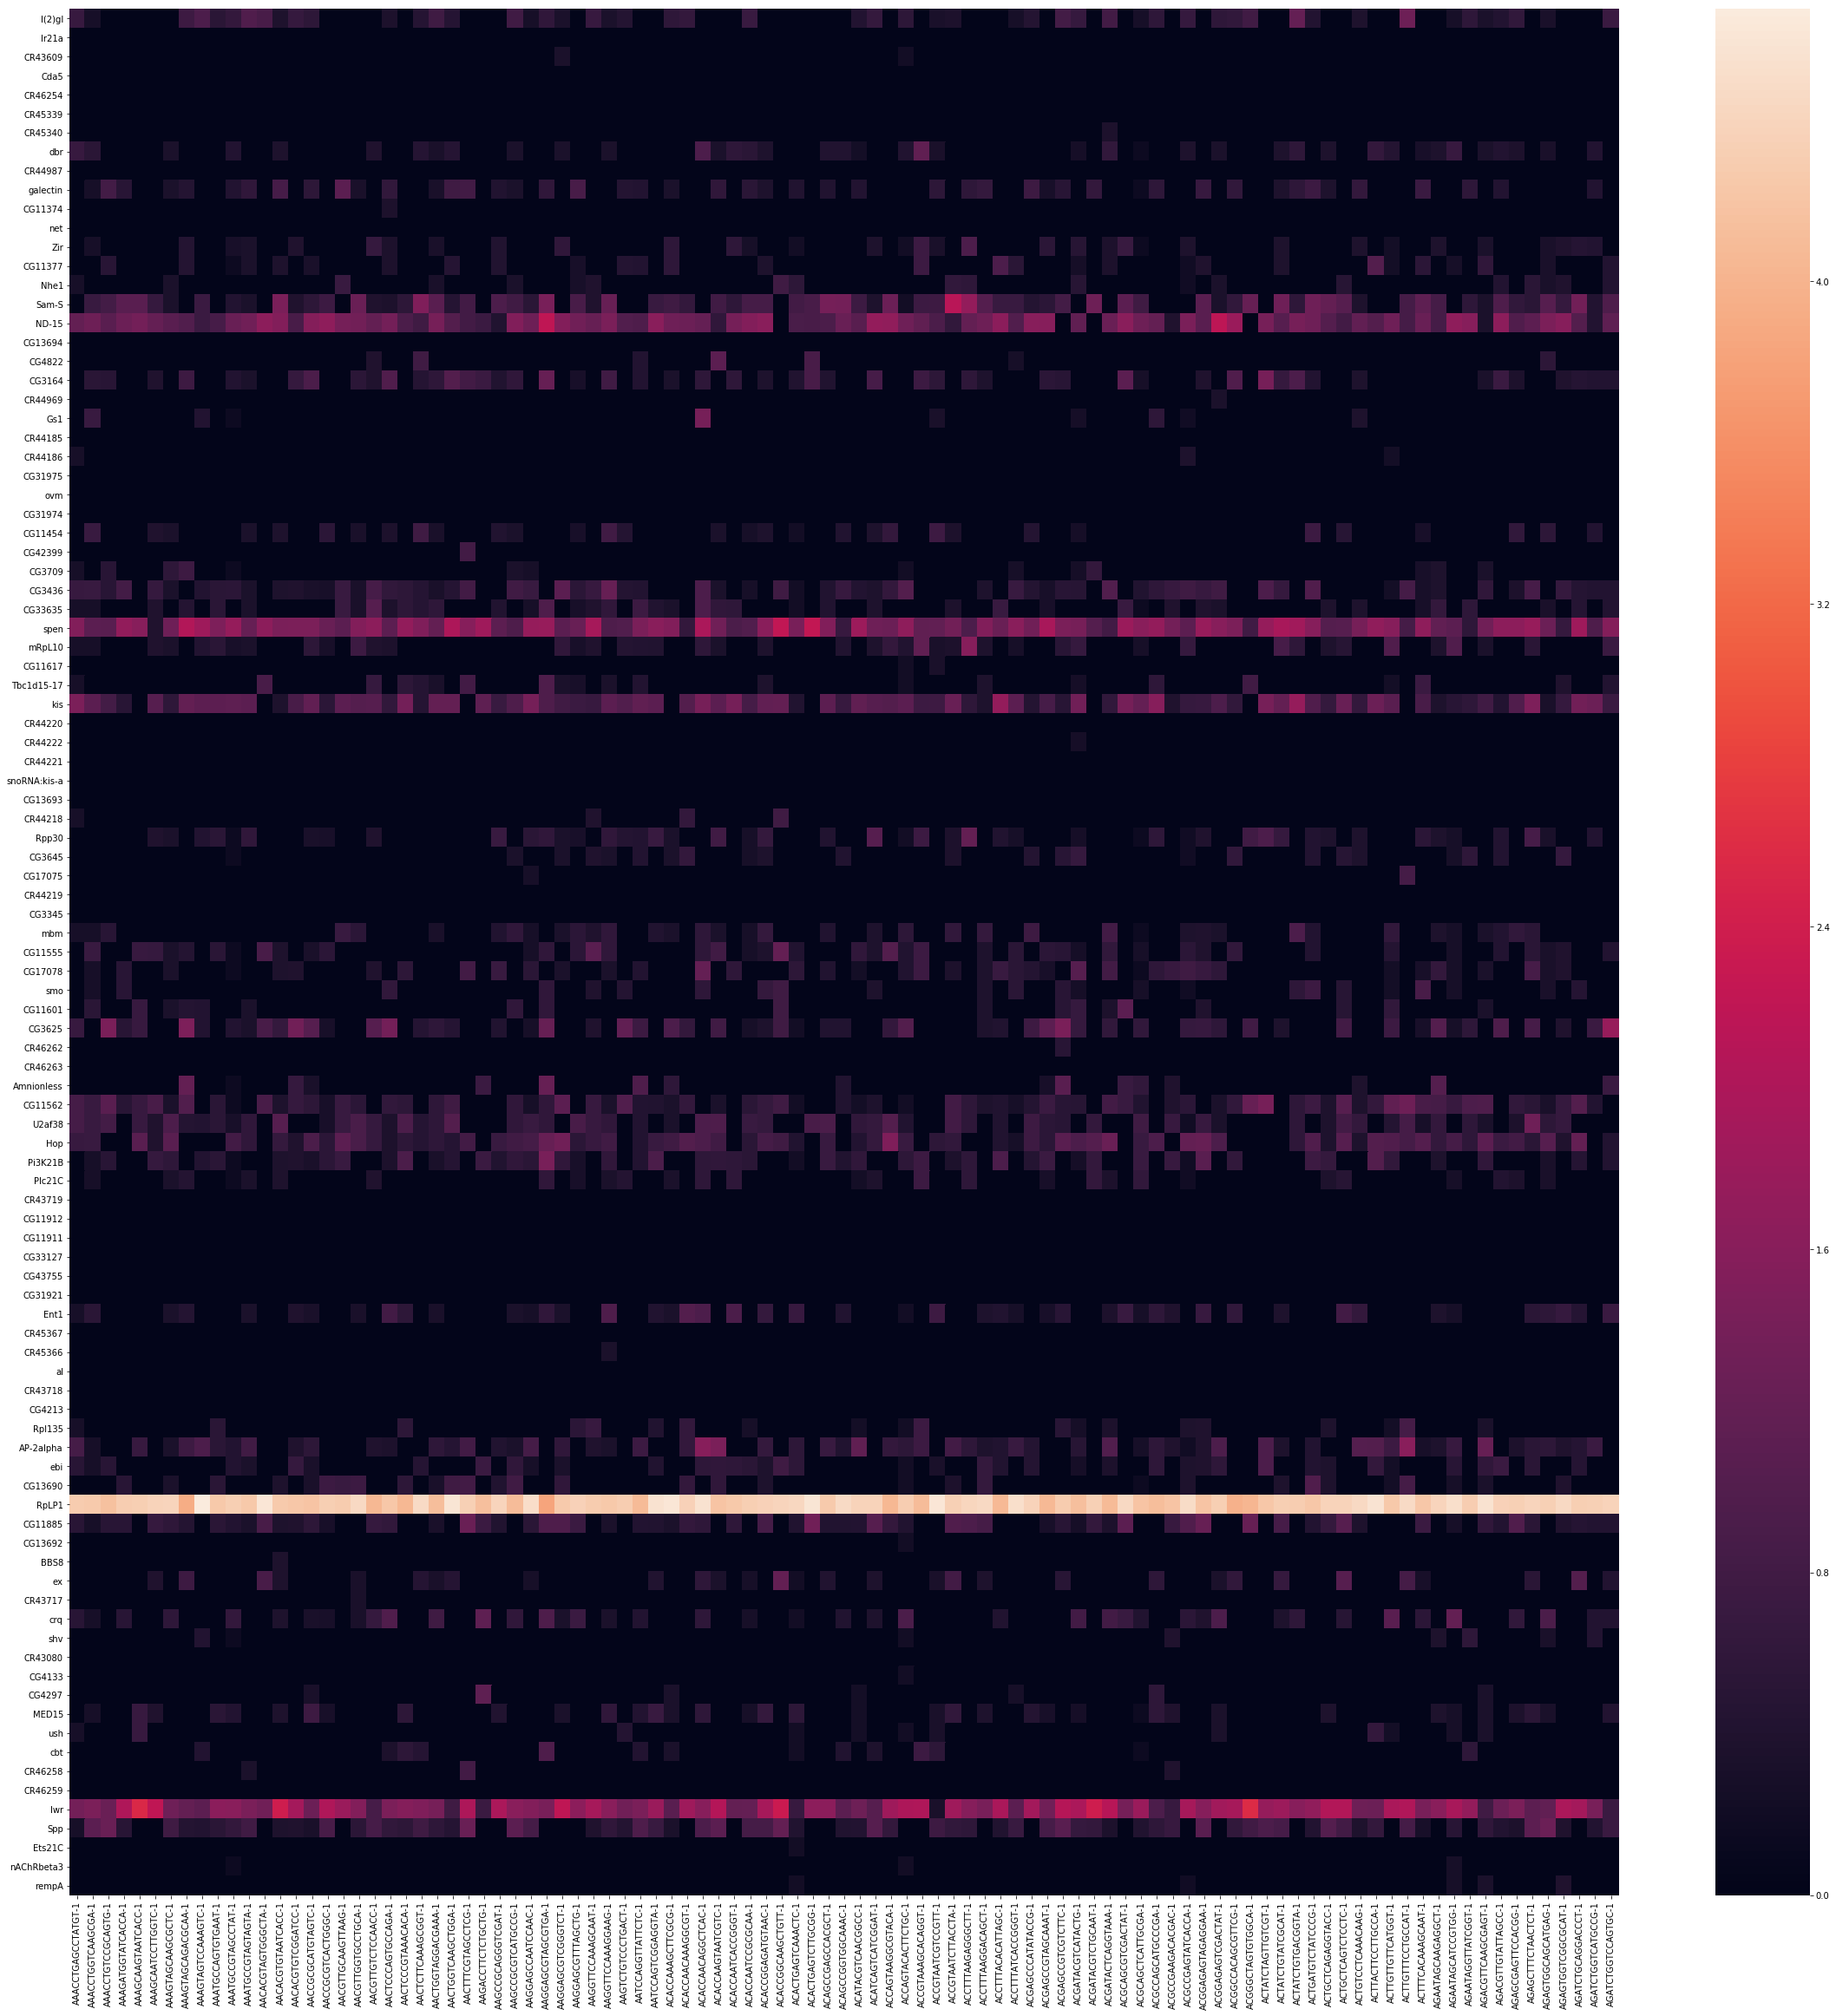

In [300]:
plt.figure(figsize=(40, 40))
sns.heatmap(combined_transformed.iloc[1:100, 1:100])

In [301]:
combined_transformed.shape

(17433, 7807)

In [303]:
combined_transformed.iloc[:, 1:100].to_csv(os.path.join(matrices_dir, "expression.tsv"), sep='\t')

In [ ]:
plt.bar(np.arange(len(filtered_lengths)), [x[0] for x in filtered_lengths.values()])

In [266]:
[x[0] for x in filtered_lengths.values()]

[753, 1178, 1526, 1294, 1524, 1252, 1697]

In [250]:
nGene_wt1 = df_wt1[df_wt1 > 0].count(axis = 0)

In [251]:
percent_mito_5percent_wt1 = percent_mito_wt1<0.05

In [252]:
percent_nGene_5000_wt1 = nGene_wt1<5000

In [253]:
df_filtered_wt1 = df_wt1.loc[:, percent_mito_5percent_wt1 & percent_nGene_5000_wt1]

In [254]:
filtered_data_frames['wt1'] = df_filtered

In [255]:
df_filtered_wt1.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGCGTCCAGCCACCA-1,TTGGAACAGTGTTAGA-1,TTGGAACGTGGTCTCG-1,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTATGCGTAGAAGGA-1,TTTGCGCAGTACGCGA-1,TTTGGTTGTCCCTACT-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,1,3,1,0,0,0,0,0,2,3,...,3,0,4,0,0,2,2,7,2,1
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Text(0.5,0.98,u'wt2 filtered')

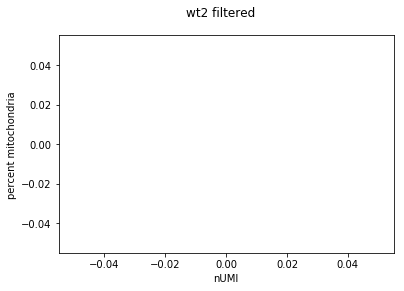

In [166]:
plt.scatter(nUMI, percent_mito)
plt.xlabel('nUMI')
plt.ylabel('percent mitochondria')
plt.suptitle('wt2 filtered')

Text(0.5,0.98,u'wt1')

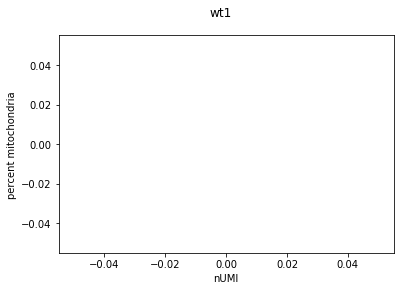

In [155]:
plt.scatter(nUMI, percent_mito)
plt.xlabel('nUMI')
plt.ylabel('percent mitochondria')

Text(0,0.5,u'nGene')

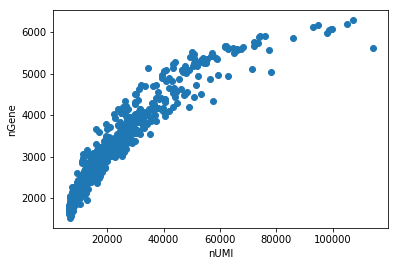

In [99]:
plt.scatter(nUMI, nGene)
plt.xlabel('nUMI')
plt.ylabel('nGene')

In [ ]:
df_filtered = df.loc[:, percent_mito_5percent & percent_nGene_5000]

In [79]:
mito_df = df[[x.__contains__("mt:") for x in df.index]]

mito_df.sum(axis=0)

AAACCTGAGAGGACGG-1     347
AAACCTGAGCCTATGT-1     818
AAACCTGGTCAAGCGA-1     629
AAACCTGTCCGCAGTG-1     261
AAAGATGGTATCACCA-1     332
AAAGCAAGTAATCACC-1     154
AAAGCAATCCTTGGTC-1     553
AAAGTAGCAAGCGCTC-1     459
AAAGTAGCAGACGCAA-1     306
AAAGTAGTCCAAAGTC-1     280
AAATGCCAGTGTGAAT-1     356
AAATGCCGTAGCCTAT-1    1249
AAATGCCGTAGTAGTA-1     560
AACACGTAGTGGGCTA-1     262
AACACGTGTAATCACC-1     426
AACACGTGTCGGATCC-1     435
AACCGCGCATGTAGTC-1     672
AACCGCGTCACTGGGC-1     877
AACGTTGCAAGTTAAG-1     164
AACGTTGGTGCCTGCA-1     615
AACGTTGTCTCCAACC-1     410
AACTCCCAGTGCCAGA-1     503
AACTCCCGTAAACACA-1     251
AACTCTTCAAAGCGGT-1     412
AACTGGTAGGACGAAA-1     467
AACTGGTCAAGCTGGA-1     342
AACTTTCGTAGCCTCG-1     157
AAGACCTTCTCTGCTG-1     194
AAGCCGCAGGGTCGAT-1     447
AAGCCGCGTCATGCCG-1     631
                      ... 
TTAGGACGTATTCTCT-1     302
TTAGGCAGTCTGGTCG-1     416
TTATGCTCAACCGCCA-1     292
TTATGCTCACCAACCG-1     485
TTCCCAGAGGACTGGT-1     445
TTCCCAGGTCGCTTTC-1     647
T

In [75]:
mitogenes = df[[x.__contains__("mt:") for x in df.index]].index

Index([u'mt:tRNA:Ile-GAT', u'mt:tRNA:Gln-TTG', u'mt:tRNA:Met-CAT', u'mt:ND2',
       u'mt:tRNA:Trp-TCA', u'mt:tRNA:Cys-GCA', u'mt:tRNA:Tyr-GTA', u'mt:CoI',
       u'mt:tRNA:Leu-TAA', u'mt:CoII', u'mt:tRNA:Lys-CTT', u'mt:tRNA:Asp-GTC',
       u'mt:ATPase8', u'mt:ATPase6', u'mt:CoIII', u'mt:tRNA:Gly-TCC',
       u'mt:ND3', u'mt:tRNA:Ala-TGC', u'mt:tRNA:Arg-TCG', u'mt:tRNA:Asn-GTT',
       u'mt:tRNA:Ser-GCT', u'mt:tRNA:Glu-TTC', u'mt:tRNA:Phe-GAA', u'mt:ND5',
       u'mt:tRNA:His-GTG', u'mt:ND4', u'mt:ND4L', u'mt:tRNA:Thr-TGT',
       u'mt:tRNA:Pro-TGG', u'mt:ND6', u'mt:Cyt-b', u'mt:tRNA:Ser-TGA',
       u'mt:ND1', u'mt:tRNA:Leu-TAG', u'mt:lrRNA', u'mt:tRNA:Val-TAC',
       u'mt:srRNA'],
      dtype='object')

In [58]:
'4mt:6'.__contains__("mt:")

True